# chargtement de librairie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf
import statsmodels.api as sm
from statsmodels import regression
import mplfinance as mpf
import math as m

In [2]:
##Initialisation time
start = "2021-07-01"
end = "2021-11-15"

In [3]:
yf.pdr_override()

# Dataset entreprise ( à changer si besoin)
PFE = web.get_data_yahoo("GE",start,end)
# SP500 Dataset
SPY = web.get_data_yahoo("SPY",start,end)

In [4]:
pos = len(PFE)
pos

96

In [5]:
PFE

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-01,109.040001,106.879997,108.639999,107.839996,5836638.0,107.661934
2021-07-02,108.320000,106.480003,108.320000,106.879997,4144988.0,106.703522
2021-07-06,106.559998,102.559998,106.239998,103.360001,8829850.0,103.189339
2021-07-07,104.639999,101.919998,103.040001,103.839996,7632563.0,103.668549
2021-07-08,103.519997,100.879997,101.839996,102.959999,6727850.0,102.789993
...,...,...,...,...,...,...
2021-11-09,116.169998,110.480003,114.730003,111.290001,25123700.0,111.192642
2021-11-10,112.680000,108.110001,112.500000,108.959999,8692600.0,108.864677
2021-11-11,109.599998,106.779999,108.550003,107.000000,5512800.0,106.906395


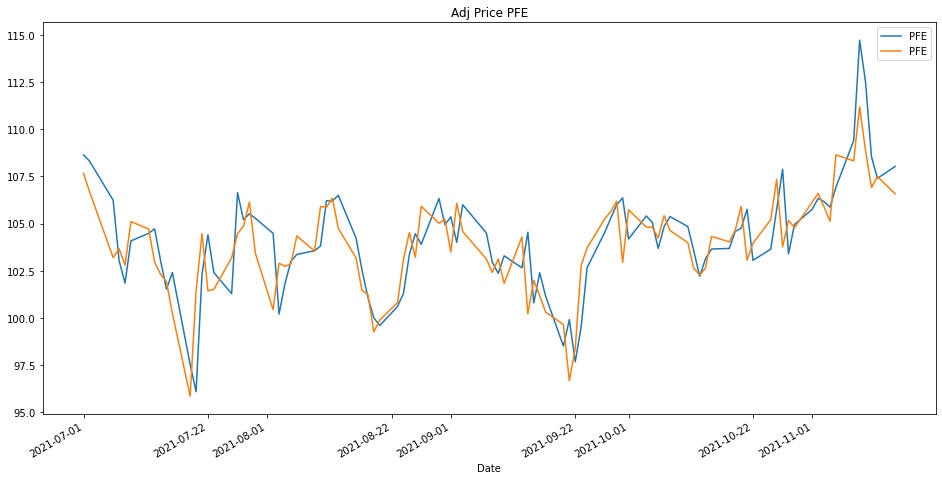

In [6]:
## Tracé de des données en fonctions du temps. Action Choisie

PFE['Open'].plot(label='PFE',figsize=(16,8),title='Open Price PFE')
PFE['Adj Close'].plot(label='PFE',figsize=(16,8),title='Adj Price PFE')

plt.legend()
plt.show()

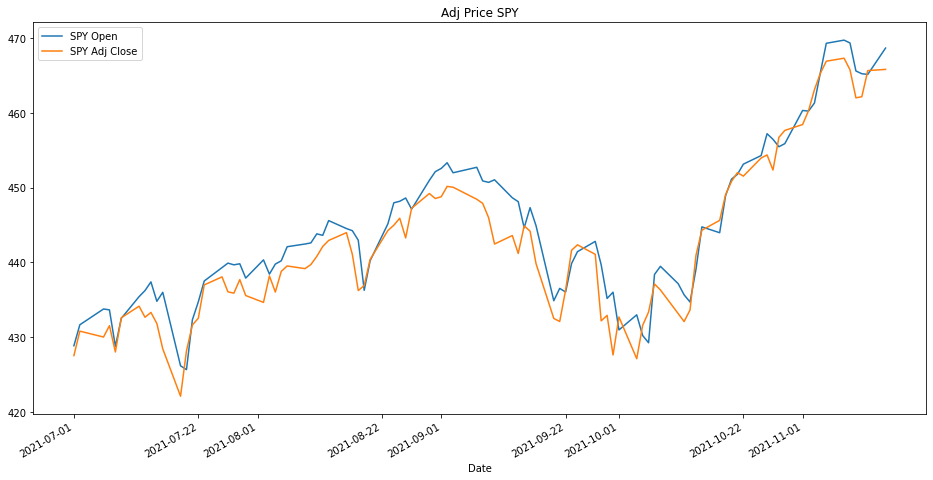

In [7]:
## Tracé des données en fonctions du temps. Action SPY500
SPY['Open'].plot(label='SPY Open',figsize=(16,8),title='Open Price Spy')
SPY['Adj Close'].plot(label='SPY Adj Close',figsize=(16,8),title='Adj Price SPY')
plt.legend()
plt.show()

# Tracé des volumes des actions - Question 8 

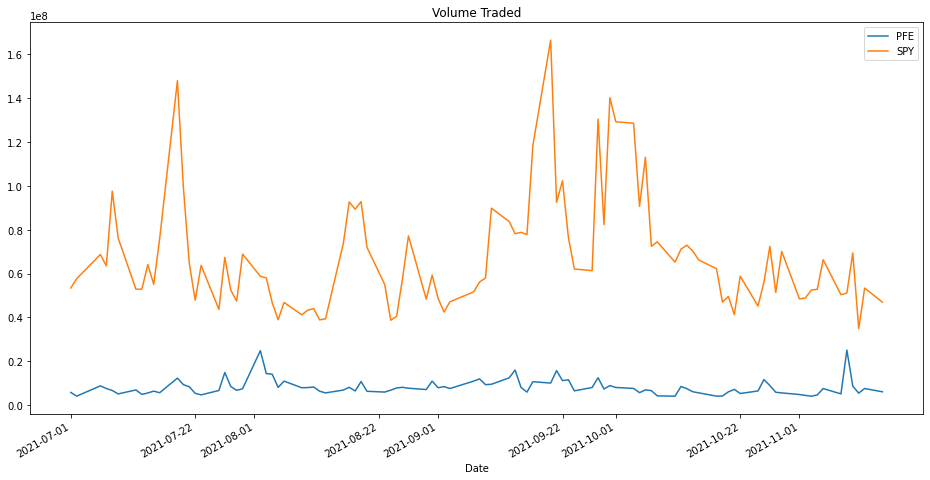

In [8]:

PFE['Volume'].plot(label='PFE',figsize=(16,8),title='Volume Traded')
SPY['Volume'].plot(label='SPY')
plt.legend()

# Question 8-9-10-11


In [9]:
# Data Control window and event window

In [10]:
##Longueur des t_Control window and t_event_window
len_t_control_window = len(PFE)-11 ## t-120 à t+5 = 125j. t -120 à t-6 =114. 125j - 114j = 11j
len_t_event_window = 6 ## t à t+5 = 6j

In [11]:
##Chargement des valeurs event window et control window dans deux dataframes distinctes
PFE_CW, SPY_CW = PFE[:][0:len_t_control_window].dropna(),SPY[:][0:len_t_control_window].dropna() ## Dataframes de t-120 à t-6
PFE_EW, SPY_EW = PFE[:][len(PFE)-len_t_event_window:].dropna(),SPY[:][len(PFE)-len_t_event_window:].dropna() 
## Dataframes de t à t+5

In [12]:
print(PFE_CW)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2021-07-01  109.040001  106.879997  108.639999  107.839996   5836638.0   
2021-07-02  108.320000  106.480003  108.320000  106.879997   4144988.0   
2021-07-06  106.559998  102.559998  106.239998  103.360001   8829850.0   
2021-07-07  104.639999  101.919998  103.040001  103.839996   7632563.0   
2021-07-08  103.519997  100.879997  101.839996  102.959999   6727850.0   
...                ...         ...         ...         ...         ...   
2021-10-25  105.989998  103.330002  103.639999  105.300003   6496200.0   
2021-10-26  110.970001  105.220001  105.760002  107.440002  11701000.0   
2021-10-27  108.279999  103.690002  107.879997  103.849998   8984300.0   
2021-10-28  105.379997  103.099998  103.389999  105.260002   5910800.0   
2021-10-29  105.239998  104.120003  104.949997  104.870003   5617100.0   

             Adj Close  
Date        

In [13]:
print(PFE_EW)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2021-11-08  110.309998  108.320000  109.400002  108.419998   5174500.0   
2021-11-09  116.169998  110.480003  114.730003  111.290001  25123700.0   
2021-11-10  112.680000  108.110001  112.500000  108.959999   8692600.0   
2021-11-11  109.599998  106.779999  108.550003  107.000000   5512800.0   
2021-11-12  107.930000  106.459999  107.400002  107.589996   7621900.0   
2021-11-15  108.669998  106.199997  108.029999  106.669998   6124900.0   

             Adj Close  
Date                    
2021-11-08  108.325150  
2021-11-09  111.192642  
2021-11-10  108.864677  
2021-11-11  106.906395  
2021-11-12  107.495872  
2021-11-15  106.576683  


In [14]:
##Fonction qui calcule le return et la volatilité 
## En entrée des fonctions, la valeur mean de la dataframe et la dataframe

def returns_stocks (df_returns):
    df_return = df_returns['daily_return'] = (df_returns['Adj Close']/ df_returns['Adj Close'].shift(1)) -1
    return df_return

#Fonction qui calcule la volatilité

def volatility (df_mean,df):
    df2 = df['Ecart'] = (df['daily_return']-df_mean)**2
    volatility_power_2 = df2.cumsum()
    volatility = (m.sqrt(volatility_power_2.max()/len(df)))
    return volatility 
    
    

# Création des valeurs returns

In [15]:
## Intégration de la colonne return aux Dataframes
PFE['daily_return'],SPY['daily_return'] =returns_stocks(PFE).dropna(),returns_stocks(SPY).dropna()
PFE_CW['daily_return'],SPY_CW['daily_return'] = returns_stocks(PFE_CW).dropna(),returns_stocks(SPY_CW).dropna()
PFE_EW['daily_return'], SPY_EW ['daily_return'] = returns_stocks(PFE_EW).dropna(),returns_stocks(SPY_EW).dropna()

In [16]:
PFE_CW

,High,Low,Open,Close,Volume,Adj Close,daily_return
Date,,,,,,,
2021-07-01,109.040001,106.879997,108.639999,107.839996,5836638.0,107.661934,NaN
2021-07-02,108.320000,106.480003,108.320000,106.879997,4144988.0,106.703522,-0.008902
2021-07-06,106.559998,102.559998,106.239998,103.360001,8829850.0,103.189339,-0.032934
2021-07-07,104.639999,101.919998,103.040001,103.839996,7632563.0,103.668549,0.004644
2021-07-08,103.519997,100.879997,101.839996,102.959999,6727850.0,102.789993,-0.008475
...,...,...,...,...,...,...,...
2021-10-25,105.989998,103.330002,103.639999,105.300003,6496200.0,105.207886,0.012013
2021-10-26,110.970001,105.220001,105.760002,107.440002,11701000.0,107.346008,0.020323
2021-10-27,108.279999,103.690002,107.879997,103.849998,8984300.0,103.759148,-0.033414


In [17]:
##  Calcul et stockage du Mean and average de la CW et EW
mean_PFE_CW, mean_SPY_CW =PFE_CW['daily_return'].mean(),SPY_CW['daily_return'].mean()
print('control window','Mean PFE',mean_PFE_CW, 'Mean SPY',mean_SPY_CW)

mean_PFE_EW, mean_SPY_EW =PFE_EW['daily_return'].mean(),SPY_EW['daily_return'].mean()
print('Event window','Mean PFE',mean_PFE_EW, 'Mean SPY',mean_SPY_EW)

##Volatility 
volatility_PFE_CW, volatility_SPY_CW = volatility (mean_PFE_CW,PFE_CW),volatility (mean_SPY_CW,SPY_CW)
print('control window','volatility PFE',volatility_PFE_CW, 'volatility SPY',volatility_SPY_CW)

volatility_PFE_EW, volatility_SPY_EW = volatility (mean_PFE_EW,PFE_EW),volatility (mean_SPY_EW,SPY_EW)
print('Event window','volatility PFE',volatility_PFE_EW, 'volatility SPY',volatility_SPY_EW)


control window Mean PFE -0.00015161414958112887 Mean SPY 0.0008346020941260619
Event window Mean PFE -0.0030980704598234433 Mean SPY -0.0006274937815586856
control window volatility PFE 0.018426780190826185 volatility SPY 0.006975316976942093
Event window volatility PFE 0.015906812905809385 volatility SPY 0.004670007598015303


# Tracés des données

<AxesSubplot:title={'center':'Returns'}, xlabel='Date'>

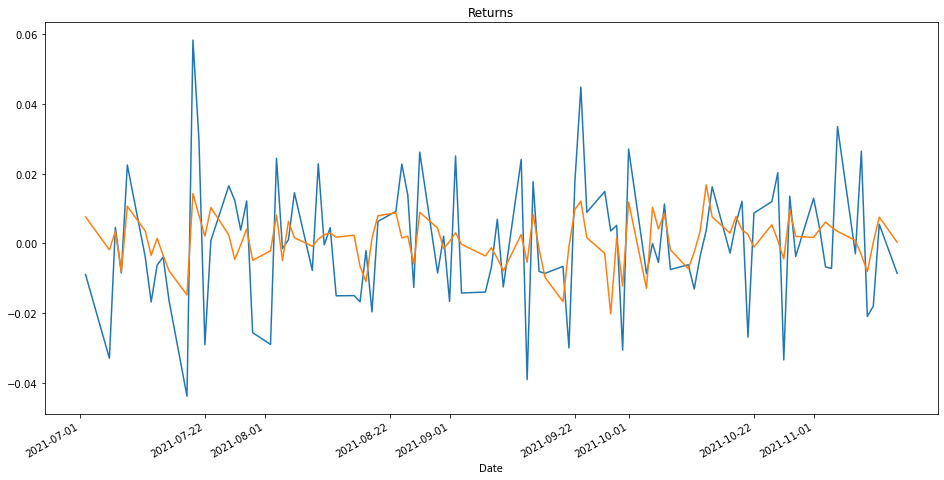

In [18]:
##Tracé du return des deux data
PFE['daily_return'].plot(label='PFE',figsize=(16,8),title='Returns')
SPY['daily_return'].plot(label='SPY',figsize=(16,8),title='Returns')

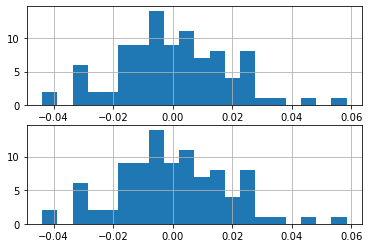

In [19]:
## Graphiques supplémentaires en histogramme. Non demandé dans le projet.
plt.subplot(211)
PFE['daily_return'].hist(bins=20)

plt.subplot(212)
PFE['daily_return'].hist(bins=20)

PFE_copy = PFE.copy()
SPY_copy=SPY.copy()

<AxesSubplot:title={'center':'SPY daily returns'}, xlabel='Date'>

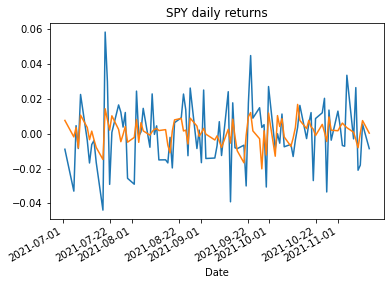

In [20]:
## Drop les valeurs NA
PFE_copy.dropna(inplace = True)
PFE_copy['daily_return'].plot(title='Pfizer daily returns')

SPY_copy.dropna(inplace = True)
SPY_copy['daily_return'].plot(title='SPY daily returns')

In [21]:
## Calcul des returns cumulés
PFE_cum_returns = (PFE_copy['daily_return'] + 1).cumprod()
SPY_cum_returns = (SPY_copy['daily_return'] + 1).cumprod()

# Tracé du return cumulé

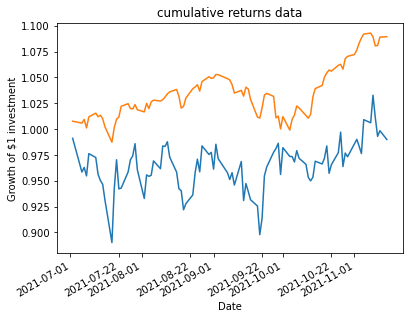

In [22]:

fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
PFE_cum_returns.plot()
SPY_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("cumulative returns data")
plt.show()

In [23]:
## Pas prendre en compte la première ligne du code
Return_PFE_CW, Return_SPY_CW  = PFE_CW['daily_return'][1:],SPY_CW['daily_return'][1:]
Return_PFE_EW, Return_SPY_EW= PFE_EW['daily_return'][1:], SPY_EW ['daily_return'][1:]

In [24]:
##Convertir le Dataframe en matrice
Y_PFE_CW,X_SPY_CW  = Return_PFE_CW.values, Return_SPY_CW.values
Y_PFE_EW,X_SPY_EW  = Return_PFE_EW.values, Return_SPY_EW.values

# Regression linéaire

# Question 12-13

In [25]:
## FOnction regression linéaire

def linreg(x,y):
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    x = x[:, 1]
    return model.params[0], model.params[1]

In [26]:
## T_Control Wwindow : Alpha and Beta
alpha_CW, beta_CW = linreg(X_SPY_CW,Y_PFE_CW)
print('alpha_CW: ' + str(alpha_CW))
print('beta_CW: ' + str(beta_CW))

alpha_CW: -0.0013969464041862596
beta_CW: 1.4921269229610044


In [27]:
## T_Control Wwindow : Alpha and Beta
alpha_EW, beta_EW = linreg(X_SPY_EW,Y_PFE_EW)
print('alpha_CW: ' + str(alpha_EW))
print('beta_CW: ' + str(beta_EW))

alpha_CW: -0.0025989762178193405
beta_CW: 0.795377192048598


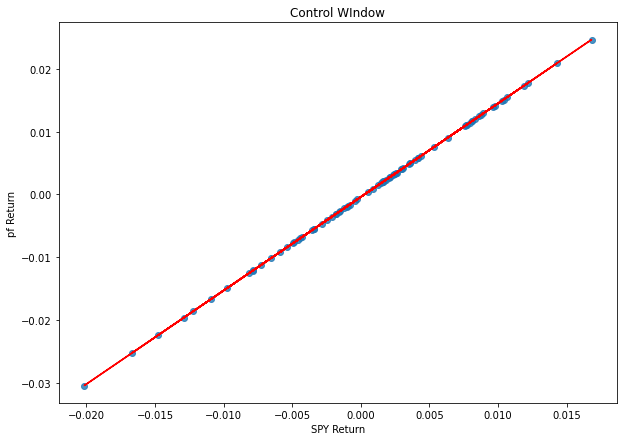

In [28]:
## Control Window
X2 = np.linspace(X_SPY_CW.min(), X_SPY_CW.max(), 100)
e= 0.001
R_t_CW =  X_SPY_CW * beta_CW + alpha_CW + e

plt.figure(figsize=(10,7))
plt.scatter(X_SPY_CW, R_t_CW, alpha=0.8) # Plot the raw data
plt.xlabel("SPY Return")
plt.ylabel("pf Return")
plt.title("Control WIndow")


plt.plot(X_SPY_CW,  R_t_CW, 'r', alpha=1)


plt.show()

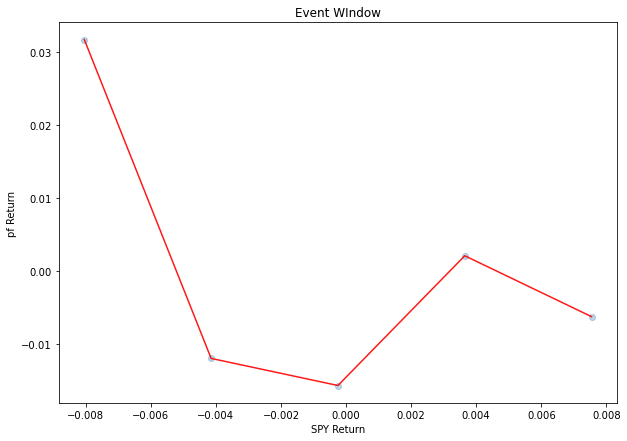

In [29]:
## Event Window
X2 = np.linspace(X_SPY_EW.min(), X_SPY_EW.max(), len(X_SPY_EW))
e= 0
AR_t_EW =  Y_PFE_EW - (beta_EW * X_SPY_EW + alpha_EW )

plt.figure(figsize=(10,7))
plt.scatter( X2   , AR_t_EW, alpha=0.3) # Plot the raw data
plt.xlabel("SPY Return")
plt.ylabel("pf Return")
plt.title("Event WIndow")


plt.plot(X2,  AR_t_EW, 'r', alpha=0.9)

##(X_SPY_EW 
plt.show()

## à revoir. Le graphique est bizzare

In [30]:
AR_t_EW 

array([ 0.03169916, -0.01193863, -0.01564659,  0.00211033, -0.00622427])

# Question 14

In [31]:
##Calcul de la somme des valeurs abnormal returns de la EW
CAR_eW = np.sum(AR_t_EW)
CAR_eW
## La fonction volatilité prend en entrée seulement les dataframes "returns"
AR_t_EW_df = pd.DataFrame ({'daily_return':AR_t_EW})


In [32]:
##Calcul de la somme cumulée des valeurs abnormal returns de la EW
CAR_eW_AR_Cum = AR_t_EW_df.cumsum()

Text(0.5, 1.0, 'Event WIndow')

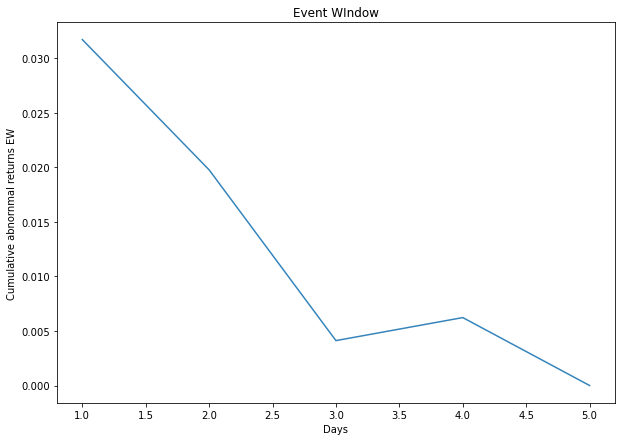

In [33]:
## Tracé de ka cumulative abnormal returns EW en fonction des jours
Jours = np.linspace(1, len(CAR_eW_AR_Cum ), len(CAR_eW_AR_Cum ))
plt.figure(figsize=(10,7))
plt.plot( Jours  , CAR_eW_AR_Cum, alpha=0.9) # Plot the raw data
plt.xlabel("Days")
plt.ylabel("Cumulative abnornmal returns EW")
plt.title("Event WIndow")


In [34]:
AR_t_EW_df

,daily_return
0,0.031699
1,-0.011939
2,-0.015647
3,0.002110
4,-0.006224


In [35]:
CAR_eW_AR_Cum

,daily_return
0,3.169916e-02
1,1.976053e-02
2,4.113940e-03
3,6.224275e-03
4,8.673617e-18


In [36]:
AR_t_EW_df

,daily_return
0,0.031699
1,-0.011939
2,-0.015647
3,0.002110
4,-0.006224


# Question 15

In [40]:
## Calcul du mean de la regression linéaire de la CW
mean_AR = R_t_CW.mean()
mean_AR

0.0008483858504188718

In [41]:
R_t_CW

array([ 0.0110081 , -0.00311483,  0.00487635, -0.01255489,  0.01553132,
        0.00494773, -0.00548362,  0.00182968, -0.00549331, -0.01210074,
       -0.02243249,  0.02098585,  0.01168387,  0.0027276 ,  0.01495416,
        0.00326597, -0.00719738, -0.00100887,  0.00579151, -0.00764336,
       -0.00352756,  0.01174234, -0.00773667,  0.00905252,  0.0020687 ,
       -0.00161095,  0.00145924,  0.00331082,  0.00407494,  0.00231844,
        0.00311651, -0.01017821, -0.0167283 ,  0.00191335,  0.01147605,
        0.01272867,  0.00197155,  0.00273418, -0.00920532,  0.01294416,
        0.0061647 , -0.00260753,  0.00039593,  0.00419382, -0.00075908,
       -0.00573218, -0.00221467, -0.00678348, -0.01216181,  0.00342174,
       -0.00844915,  0.01206627, -0.00276237, -0.01493188, -0.02527693,
       -0.00180645,  0.01415849,  0.01773236,  0.00206089, -0.00466579,
       -0.03046597,  0.0021145 , -0.01863426,  0.01733577, -0.01963953,
        0.01512867,  0.0058044 ,  0.01250353, -0.00311825, -0.01

In [42]:
## Transformation de la regression linéaire CW en df
R_t_CW_df = pd.DataFrame ({'daily_return':R_t_CW})

In [43]:
## Calcul du sigma de la regression linéaire de la CW 
Sigma_AR = volatility (mean_AR,R_t_CW_df)

In [44]:
Sigma_AR

0.010469827691507092

In [45]:
##Calcul de la somme cumulée de la regression linéaire
CAR_eW_AR_Cum = R_t_CW_df.cumsum()

In [46]:
##Calcul du test statistics
Stat2 = CAR_eW_AR_Cum/(np.sqrt(6)*Sigma_AR)

Text(0.5, 1.0, 'CAR_eW_AR_Cum')

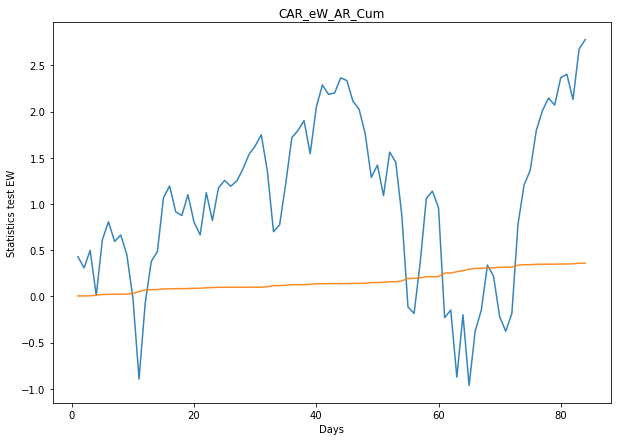

In [47]:
##Tracé du test statistics
Jours = np.linspace(1, len(CAR_eW_AR_Cum ), len(CAR_eW_AR_Cum ))
plt.figure(figsize=(10,7))
plt.plot( Jours  , Stat2 , alpha=0.9) # Plot the raw data
plt.xlabel("Days")
plt.ylabel("Statistics test EW")
plt.title("CAR_eW_AR_Cum")


In [49]:
##Test stastisitcs
Stat = Stat2['daily_return'].max()
Stat

2.778801618953848